In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

In [3]:
# 1.fitting it to the periodic function
#  An equation that can be used to model these data is of the form: y = A cos B(x + C) + D, where A,B,C,D, are constants, y is the temperature in °C and x is the month (1–12).
# A = amplitude = (ymax - ymin)/2
# B = 2π/b; where b is the maximum value of x
# C = units translated to the right
# D = ymin + amplitude = units translated up


def periodic_func(x,A,C,D):
    return(A*np.cos((2*np.pi/x.max())*(x+C))+D)


from scipy.optimize import curve_fit
res_max, cov_max = curve_fit(periodic_func, months,max_temp, [40, 20, 0])
res_min, cov_min = curve_fit(periodic_func, months,min_temp, [-40, 20, 0])
print(res_max,res_min)


[10.59083163 17.83370156 39.88861733] [-7.74472963 22.93101294 25.55626462]


Text(0, 0.5, 'Tenperature(°C)')

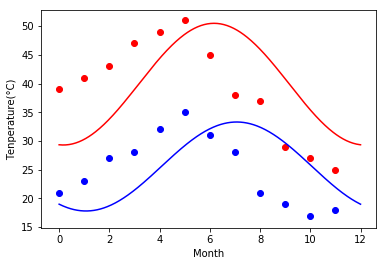

In [4]:
# 2.plot the fit

days = np.linspace(0,12,num=365)

plt.scatter(x=months,y=max_temp,color="r")
plt.plot(days,periodic_func(days,*res_max),'r-')
plt.scatter(x=months,y=min_temp,color="b")
plt.plot(days,periodic_func(days,*res_min),"b-")
plt.xlabel("Month")
plt.ylabel("Tenperature(°C)")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url,sep=",")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'male/female proportion')

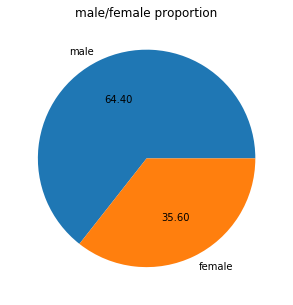

In [7]:
#1. Create a pie chart presenting the male/female proportion
prop = titanic["sex"].value_counts()
fig=plt.figure(figsize=(5,5))
plt.pie(prop,autopct="%.2f",labels=prop.index.values)
plt.title("male/female proportion")



Text(0.5, 1.0, 'Scatterplot between the Fare paid and the Age')

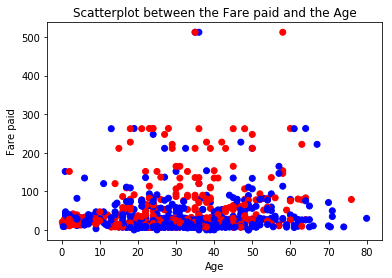

In [8]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
colors = {"male":"blue","female":"red"}
titanic.dropna(subset=["sex"],inplace=True)
plt.scatter(x = titanic["age"],y = titanic["fare"],c=titanic["sex"].map(colors))
plt.xlabel("Age")
plt.ylabel("Fare paid")
plt.title("Scatterplot between the Fare paid and the Age")